## Importing Libraries


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

## Reading Data


In [2]:
df = pd.read_csv('./Indian_housing_Mumbai_data.csv')

In [3]:
print(df.head())

         house_type   house_size        location    city   latitude  \
0  2 BHK Apartment   1,180 sq ft            Ulwe  Mumbai  18.971046   
1  2 BHK Apartment   1,120 sq ft            Ulwe  Mumbai  18.966377   
2  2 BHK Apartment   1,200 sq ft          Panvel  Mumbai  18.965979   
3  2 BHK Apartment     750 sq ft  Kandivali West  Mumbai  19.213598   
4  3 BHK Apartment   1,400 sq ft         Chembur  Mumbai  19.062933   

   longitude  price currency  numBathrooms  numBalconies isNegotiable  \
0  73.017723  19000      INR           2.0           NaN          NaN   
1  73.012802  12500      INR           2.0           NaN          NaN   
2  73.124649  22000      INR           2.0           NaN          NaN   
3  72.833633  28500      INR           2.0           NaN          NaN   
4  72.892395  50000      INR           3.0           NaN          NaN   

   priceSqFt    verificationDate  \
0        NaN  Posted 2 years ago   
1        NaN  Posted 2 years ago   
2        NaN  Posted a mon

In [4]:
print(df.describe())

          latitude    longitude         price  numBathrooms  numBalconies  \
count  5000.000000  5000.000000  5.000000e+03   4986.000000    733.000000   
mean     19.159138    72.953226  6.239421e+04      2.033895      2.064120   
std       0.435495     0.564369  8.874473e+04      0.800861      1.095187   
min      17.468220    72.719688  2.800000e+03      1.000000      1.000000   
25%      19.070265    72.839161  2.100000e+04      2.000000      1.000000   
50%      19.128770    72.884460  4.000000e+04      2.000000      2.000000   
75%      19.195199    72.995323  7.000000e+04      2.000000      3.000000   
max      30.888254    91.792137  1.200000e+06      7.000000      6.000000   

       priceSqFt  
count        0.0  
mean         NaN  
std          NaN  
min          NaN  
25%          NaN  
50%          NaN  
75%          NaN  
max          NaN  


In [5]:
df.columns

Index(['house_type', 'house_size', 'location', 'city', 'latitude', 'longitude',
       'price', 'currency', 'numBathrooms', 'numBalconies', 'isNegotiable',
       'priceSqFt', 'verificationDate', 'description', 'SecurityDeposit',
       'Status'],
      dtype='object')

## Processing the Data


In [6]:
columns_to_drop = ['isNegotiable', 'priceSqFt', 'verificationDate', 'description', 'SecurityDeposit']
df = df.drop(columns=columns_to_drop)

In [7]:
print(df.isnull().sum())

house_type         0
house_size         0
location           0
city               0
latitude           0
longitude          0
price              0
currency           0
numBathrooms      14
numBalconies    4267
Status             0
dtype: int64


In [8]:
df['numBathrooms'].fillna(0, inplace=True)
df['numBalconies'].fillna(0, inplace=True)

C:\Users\BLour\AppData\Local\Temp\ipykernel_5580\1826363049.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['numBathrooms'].fillna(0, inplace=True)
C:\Users\BLour\AppData\Local\Temp\ipykernel_5580\1826363049.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, wh

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   house_type    5000 non-null   object 
 1   house_size    5000 non-null   object 
 2   location      5000 non-null   object 
 3   city          5000 non-null   object 
 4   latitude      5000 non-null   float64
 5   longitude     5000 non-null   float64
 6   price         5000 non-null   int64  
 7   currency      5000 non-null   object 
 8   numBathrooms  5000 non-null   float64
 9   numBalconies  5000 non-null   float64
 10  Status        5000 non-null   object 
dtypes: float64(4), int64(1), object(6)
memory usage: 429.8+ KB


In [10]:
df.head()

,house_type,house_size,location,city,latitude,longitude,price,currency,numBathrooms,numBalconies,Status
0,2 BHK Apartment,"1,180 sq ft",Ulwe,Mumbai,18.971046,73.017723,19000,INR,2.0,0.0,Furnished
1,2 BHK Apartment,"1,120 sq ft",Ulwe,Mumbai,18.966377,73.012802,12500,INR,2.0,0.0,Unfurnished
2,2 BHK Apartment,"1,200 sq ft",Panvel,Mumbai,18.965979,73.124649,22000,INR,2.0,0.0,Unfurnished
3,2 BHK Apartment,750 sq ft,Kandivali West,Mumbai,19.213598,72.833633,28500,INR,2.0,0.0,Unfurnished
4,3 BHK Apartment,"1,400 sq ft",Chembur,Mumbai,19.062933,72.892395,50000,INR,3.0,0.0,Semi-Furnished


In [11]:
df = pd.get_dummies(df, drop_first=True)

In [12]:
df.head(10)

,latitude,longitude,price,numBathrooms,numBalconies,house_type_1 BHK Independent Floor,house_type_1 BHK Independent House,house_type_1 BHK Villa,house_type_1 RK Studio Apartment,house_type_2 BHK Apartment,...,location_juhu tara,location_karanjade panvel,location_matunga east,location_nallasopara W,location_vakola santacuz e,location_vile parle west,location_yogi nagar,city_Mumbai,Status_Semi-Furnished,Status_Unfurnished
0,18.971046,73.017723,19000,2.0,0.0,False,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
1,18.966377,73.012802,12500,2.0,0.0,False,False,False,False,True,...,False,False,False,False,False,False,False,True,False,True
2,18.965979,73.124649,22000,2.0,0.0,False,False,False,False,True,...,False,False,False,False,False,False,False,True,False,True
3,19.213598,72.833633,28500,2.0,0.0,False,False,False,False,True,...,False,False,False,False,False,False,False,True,False,True
4,19.062933,72.892395,50000,3.0,0.0,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
5,19.144207,73.246994,3000,1.0,0.0,False,False,False,True,False,...,False,False,False,False,False,False,False,True,False,True
6,19.227549,73.081505,9500,2.0,0.0,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,True
7,19.061171,72.831627,55000,2.0,0.0,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
8,19.108765,72.865692,50000,2.0,0.0,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
9,19.307293,72.861748,25000,1.0,0.0,False,False,False,False,True,...,False,False,False,False,False,False,False,True,True,False


# Data Visualization


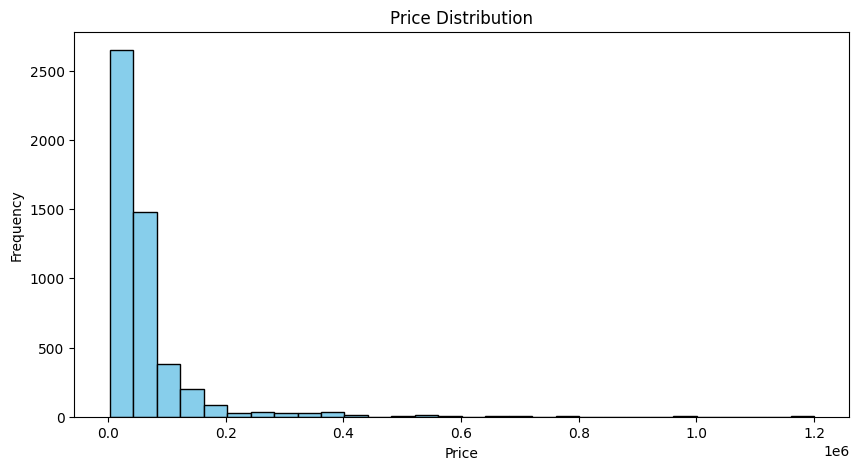

In [13]:
plt.figure(figsize=(10, 5))
plt.hist(df['price'].dropna(), bins=30, color='skyblue', edgecolor='black')
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

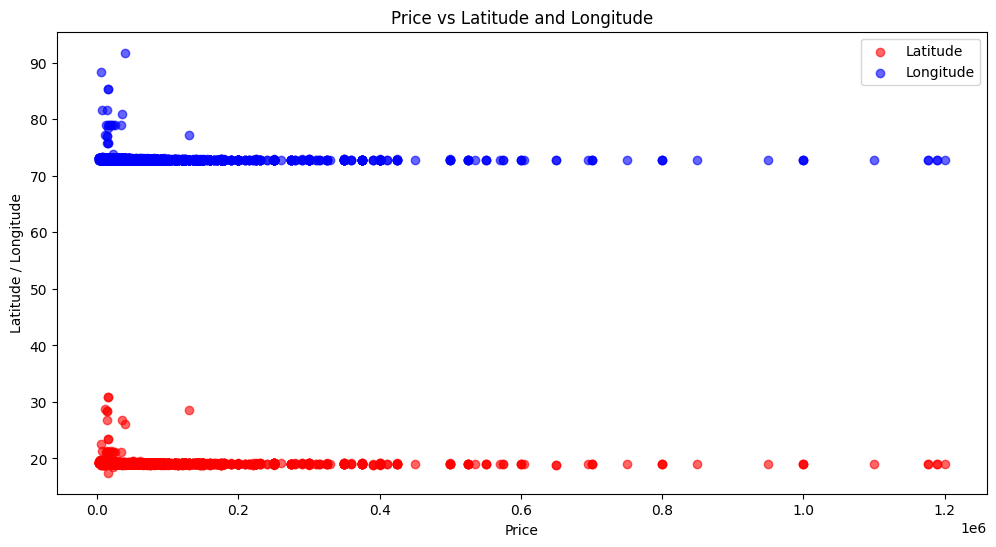

In [14]:
plt.figure(figsize=(12, 6))
plt.scatter(df['price'], df['latitude'], color='red', label='Latitude', alpha=0.6)
plt.scatter(df['price'], df['longitude'], color='blue', label='Longitude', alpha=0.6)
plt.title('Price vs Latitude and Longitude')
plt.xlabel('Price')
plt.ylabel('Latitude / Longitude')
plt.legend()
plt.show()

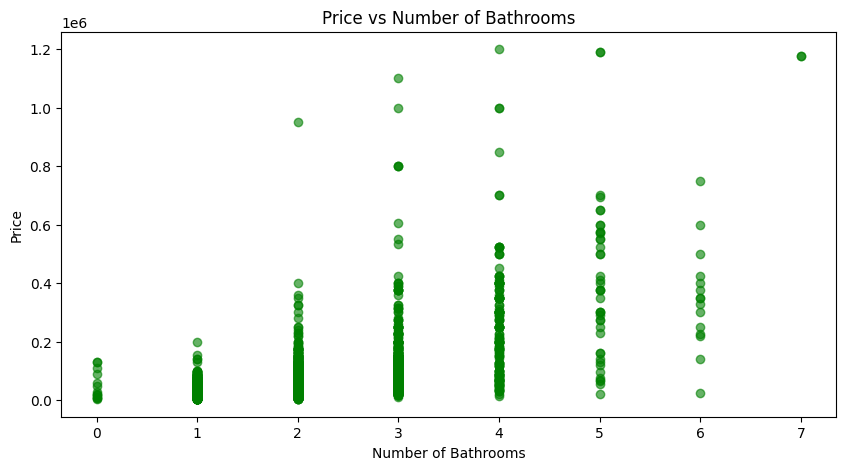

In [15]:
plt.figure(figsize=(10, 5))
plt.scatter(df['numBathrooms'], df['price'], color='green', alpha=0.6)
plt.title('Price vs Number of Bathrooms')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Price')
plt.show()

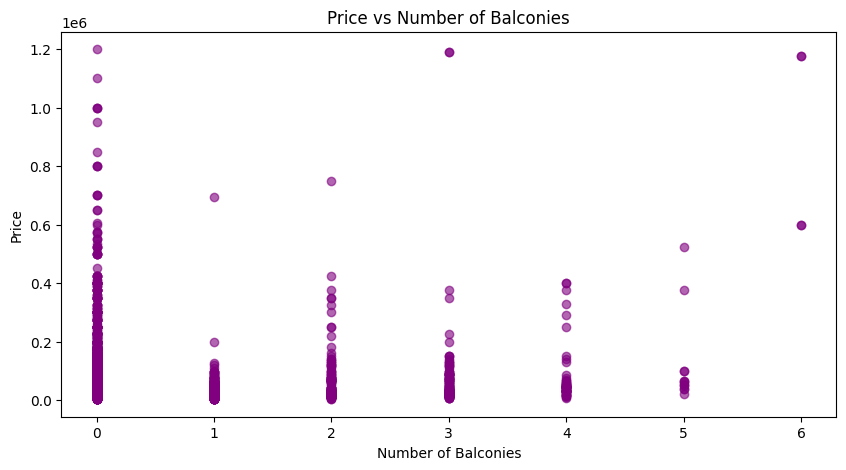

In [16]:
plt.figure(figsize=(10, 5))
plt.scatter(df['numBalconies'], df['price'], color='purple', alpha=0.6)
plt.title('Price vs Number of Balconies')
plt.xlabel('Number of Balconies')
plt.ylabel('Price')
plt.show()

C:\Users\BLour\AppData\Local\Temp\ipykernel_5580\1608854901.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df_long[df_long['House Type'] == ht]['price'] for ht in house_types], labels=house_types)


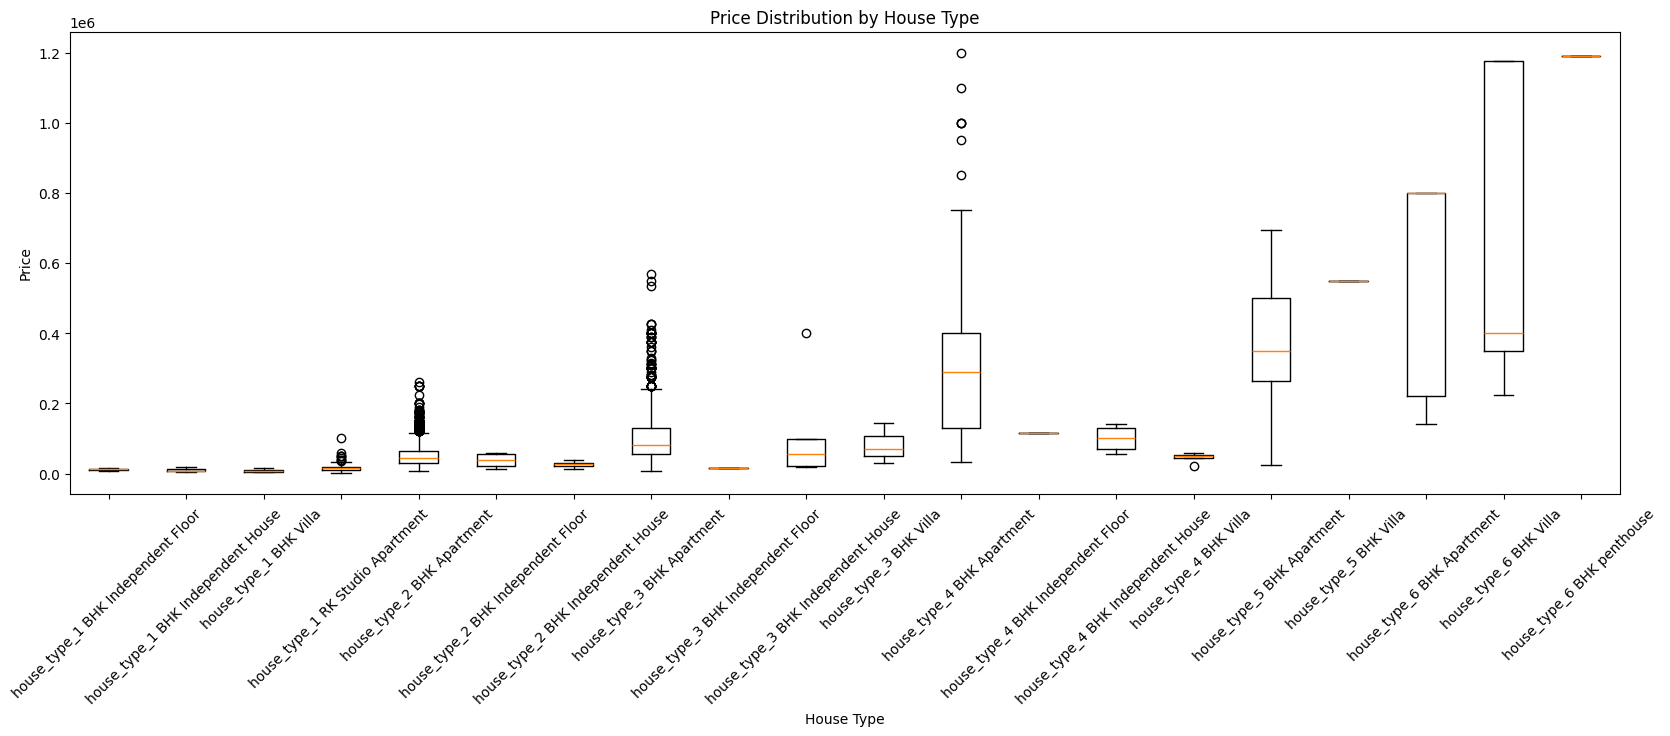

In [26]:

house_types = [col for col in df.columns if col.startswith('house_type')]
plt.figure(figsize=(20, 6))
df_long = pd.melt(df, id_vars=['price'], value_vars=house_types, var_name='House Type', value_name='Type')
df_long = df_long[df_long['Type'] == 1]  # Filter only relevant rows where house type is present

plt.boxplot([df_long[df_long['House Type'] == ht]['price'] for ht in house_types], labels=house_types)
plt.title('Price Distribution by House Type')
plt.xlabel('House Type')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()


## Spliting the Data


In [18]:
X = df.drop('price', axis=1)  # Replace 'Rent' with the name of the rent column
y = df['price']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Training model


In [21]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [22]:
y_pred = model.predict(X_test)

## Evaluate the Model


In [23]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [24]:
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 2864175818.655002
R-squared: 0.7523721046503262


## Results


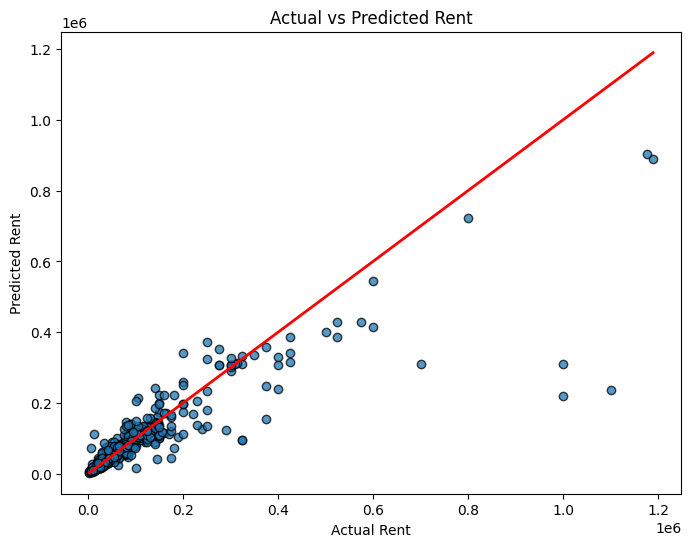

In [25]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, edgecolor='k', alpha=0.75)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)
plt.xlabel('Actual Rent')
plt.ylabel('Predicted Rent')
plt.title('Actual vs Predicted Rent')
plt.show()

